In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_data_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_de = df[df["job_country"] == "Germany"].copy()
df_de.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None
78,Senior Data Scientist,Senior Data Expert,"Berlin, Germany",via Jobs Trabajo.org,Full-time,False,Germany,2023-10-27 13:13:25,False,False,Germany,None,NaN,NaN,SIXT Germany,"[sql, excel, looker, sap]","{'analyst_tools': ['excel', 'looker', 'sap'], ..."
104,Software Engineer,Senior Software Engineer - Metadata,"Berlin, Germany",via Snowflake Careers,Full-time,False,Germany,2023-10-27 13:13:54,False,False,Germany,None,NaN,NaN,Snowflake,"[c++, java, snowflake]","{'cloud': ['snowflake'], 'programming': ['c++'..."


In [6]:
top_data_jobs_de = df_de["job_title_short"].value_counts().head(4).index.to_list()
top_data_jobs_de

['Data Analyst', 'Data Scientist', 'Data Engineer', 'Senior Data Engineer']

In [8]:
df_de_exploded = df_de.explode("job_skills").copy()
df_de_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,python,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,sql,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,c#,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,azure,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,airflow,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
df_de_exploded = df_de_exploded[df_de_exploded["job_title_short"].isin(top_data_jobs_de)]
df_de_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,python,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,sql,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,c#,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,azure,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,airflow,"{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Pure App,docker,"{'cloud': ['bigquery', 'aws'], 'libraries': ['..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [14]:
df_de_exploded = df_de_exploded.groupby(by=["job_title_short", "job_skills"])[["job_title_short", "job_skills"]].value_counts()
df_de_exploded = df_de_exploded.reset_index(name="job_count")
df_de_exploded = df_de_exploded.sort_values(by="job_count", ascending=False)
df_de_exploded

,job_title_short,job_skills,job_count
474,Data Scientist,python,4157
295,Data Engineer,python,3524
325,Data Engineer,sql,3145
131,Data Analyst,sql,2947
107,Data Analyst,python,2309
...,...,...,...
327,Data Engineer,sqlite,1
595,Senior Data Engineer,mariadb,1
517,Data Scientist,twilio,1
309,Data Engineer,sass,1


In [41]:
df_de_exploded["job_skills"] = df_de_exploded["job_skills"].apply(lambda skill: skill.upper())
df_de_exploded[df_de_exploded["job_title_short"] == "Data Analyst"]

,job_title_short,job_skills,job_count
131,Data Analyst,SQL,2947
107,Data Analyst,PYTHON,2309
141,Data Analyst,TABLEAU,1366
35,Data Analyst,EXCEL,1329
101,Data Analyst,POWER BI,1305
...,...,...,...
139,Data Analyst,SYMPHONY,1
105,Data Analyst,PUPPET,1
116,Data Analyst,RUST,1
137,Data Analyst,SVN,1


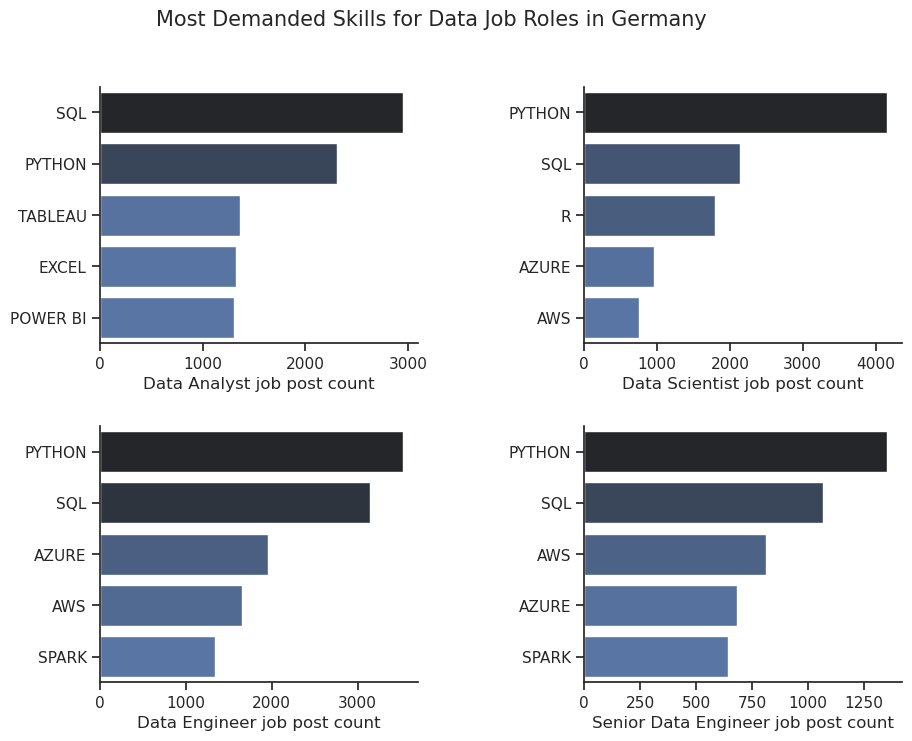

In [ ]:
fig, ax = plt.subplots(int(len(top_data_jobs_de)/2), 2)
sns.set_theme(style="ticks")

for i, job_title in enumerate(top_data_jobs_de):
  df_plot = df_de_exploded[df_de_exploded["job_title_short"] == job_title].head()
  ax_plot = ax[int(i/2),i%2]

  sns.barplot(df_plot, x="job_count", y="job_skills", ax=ax_plot, legend=False, hue="job_count", palette="dark:b_r")
  sns.despine()
  ax_plot.set_xlabel(f"{job_title} job post count")
  ax_plot.set_ylabel("")

fig.suptitle("Most Demanded Skills for Data Job Roles in Germany", fontsize=15)
fig.tight_layout(h_pad=.05)
fig.set_figheight(8)
fig.set_figwidth(10)


In [79]:
df_de_total = df_de["job_title_short"].value_counts().head(4).reset_index(name="total_jobs")
df_de_total

,job_title_short,total_jobs
0,Data Analyst,7131
1,Data Scientist,6745
2,Data Engineer,6675
3,Senior Data Engineer,2041


In [81]:
df_merged = df_de_exploded.merge(df_de_total, how="left", on="job_title_short")
df_merged

,job_title_short,job_skills,job_count,total_jobs
0,Data Scientist,PYTHON,4157,6745
1,Data Engineer,PYTHON,3524,6675
2,Data Engineer,SQL,3145,6675
3,Data Analyst,SQL,2947,7131
4,Data Analyst,PYTHON,2309,7131
...,...,...,...,...
672,Data Engineer,SQLITE,1,6675
673,Senior Data Engineer,MARIADB,1,2041
674,Data Scientist,TWILIO,1,6745
675,Data Engineer,SASS,1,6675


In [85]:
df_merged["job_skill_percent"] = 100 * df_merged["job_count"] / df_merged["total_jobs"]
df_merged

,job_title_short,job_skills,job_count,total_jobs,job_skill_percent
0,Data Scientist,PYTHON,4157,6745,61.630838
1,Data Engineer,PYTHON,3524,6675,52.794007
2,Data Engineer,SQL,3145,6675,47.116105
3,Data Analyst,SQL,2947,7131,41.326602
4,Data Analyst,PYTHON,2309,7131,32.379750
...,...,...,...,...,...
672,Data Engineer,SQLITE,1,6675,0.014981
673,Senior Data Engineer,MARIADB,1,2041,0.048996
674,Data Scientist,TWILIO,1,6745,0.014826
675,Data Engineer,SASS,1,6675,0.014981


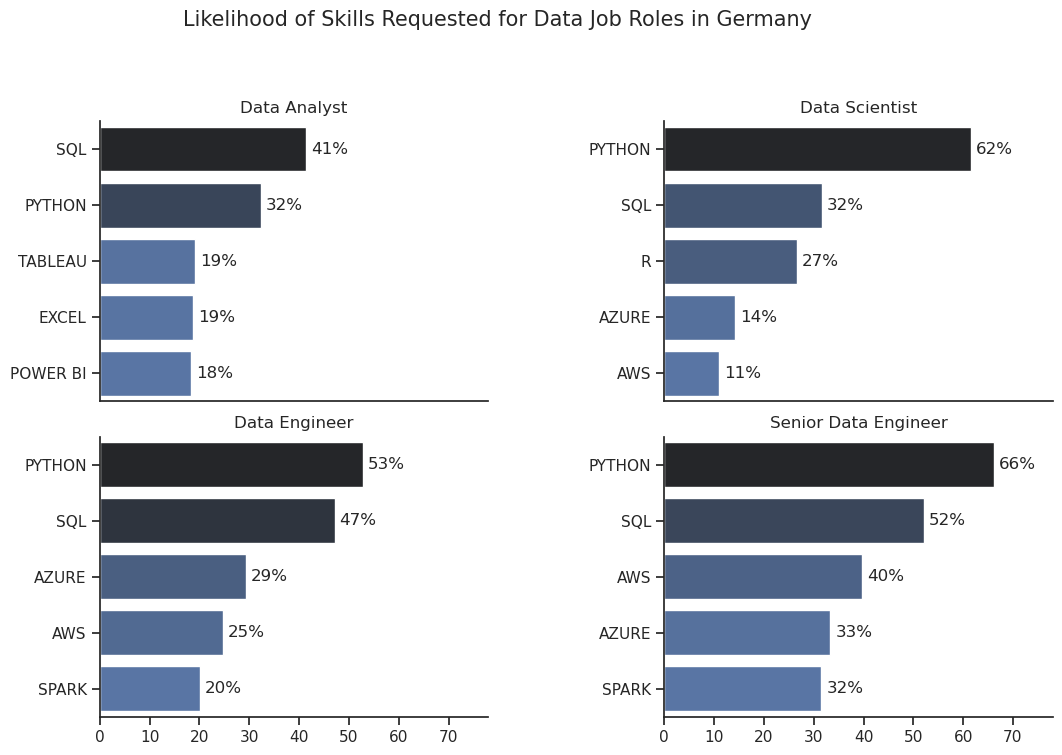

In [101]:
fig, ax = plt.subplots(int(len(top_data_jobs_de)/2), 2)
sns.set_theme(style="ticks")

for i, job_title in enumerate(top_data_jobs_de):
  df_plot = df_merged[df_merged["job_title_short"] == job_title].head()
  ax_plot = ax[int(i/2),i%2]

  sns.barplot(df_plot, x="job_skill_percent", y="job_skills", ax=ax_plot, legend=False, hue="job_count", palette="dark:b_r")
  sns.despine()
  ax_plot.set_xlim(0, 78)
  ax_plot.set_title(job_title)
  ax_plot.set_xlabel("")
  ax_plot.set_ylabel("")

  for key, val in enumerate(df_plot["job_skill_percent"]):
    ax_plot.text(val+1, key, f"{val:.0f}%", va="center")

  if i < 2:
    ax_plot.set_xticks([])

fig.suptitle("Likelihood of Skills Requested for Data Job Roles in Germany", fontsize=15)
fig.tight_layout(h_pad=.05)
fig.set_figheight(8)
fig.set_figwidth(12)

In [99]:
top_data_jobs_de

['Data Analyst', 'Data Scientist', 'Data Engineer', 'Senior Data Engineer']